This program will run different machine learning models to predict redshift from photometric data.
Data loaded successfully.
MLP MAE: 0.1341937678364476, MLP RMSE: 0.18007712852372812
Random Forest MAE: 0.09912250874403818, Random Forest RMSE: 0.1438112792784664
Decision Tree MAE: 0.13816359300476946, Decision Tree RMSE: 0.20054248141515119
           Model       MAE      RMSE
0            MLP  0.134194  0.180077
1  Random Forest  0.099123  0.143811
2  Decision Tree  0.138164  0.200542


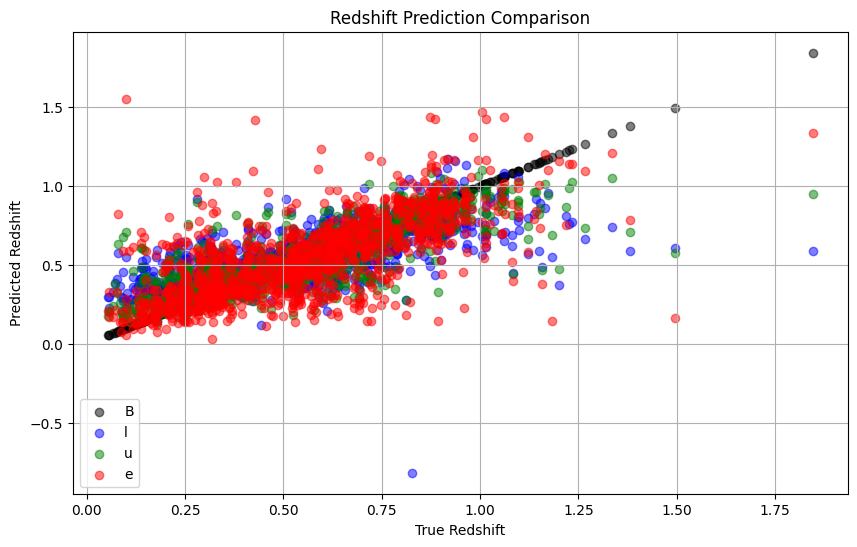

In [ ]:
# Photo Analizer of Redshift #

import time
import os
import numpy
import pandas
import matplotlib.pyplot
import seaborn
import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

print(
    "This program will run different machine learning models to predict redshift from photometric data."
)
time.sleep(2)

# Load the first CSV file (assumes it contains the test data)
data = pandas.read_csv("/home/lucas/Documentos/ML_2025-2/Meugithub/Machine-Learning---IF---UFRJ/ML-metodos-scikit/des_match_vvds_clean.csv")
print("Data loaded successfully.")

# Check for missing values
if data.isnull().values.any():
    print(
        "Data contains missing values. Make sure that you have 'des_match_vvds_clean.csv in this repository."
    )
    exit()

# The 'z' columns is the target and the 'mag_*' and 'mag_err_' columns are the predictor
y = data["z"]
X = data[
    [
        "mag_auto_g_dered",
        "mag_auto_r_dered",
        "mag_auto_i_dered",
        "mag_auto_z_dered",
        "mag_auto_y_dered",
        "magerr_auto_g",
        "magerr_auto_r",
        "magerr_auto_i",
        "magerr_auto_z",
        "magerr_auto_y",
    ]
]

# Split the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1. Multi-Layer Perceptron

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
# Evaluate MLP performance
mlp_mae = mean_absolute_error(y_test, y_pred_mlp)
mlp_rmse = numpy.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"MLP MAE: {mlp_mae}, MLP RMSE: {mlp_rmse}")


# 2. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# Evaluate Random Forest performance
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = numpy.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest MAE: {rf_mae}, Random Forest RMSE: {rf_rmse}")

# 3. Decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
# Evaluate Decision Tree performance
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = numpy.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree MAE: {dt_mae}, Decision Tree RMSE: {dt_rmse}")

# Compare the models
results = pandas.DataFrame(
    {
        "Model": ["MLP", "Random Forest", "Decision Tree"],
        "MAE": [mlp_mae, rf_mae, dt_mae],
        "RMSE": [mlp_rmse, rf_rmse, dt_rmse],
    }
)
print(results)

# Compare the plots of the models in same graph

matplotlib.pyplot.figure(figsize=(10, 6))
matplotlib.pyplot.scatter(y_test, y_test, color="black", label="Ideal", alpha=0.5)
matplotlib.pyplot.scatter(y_test, y_pred_mlp, color="blue", label="MLP", alpha=0.5)
matplotlib.pyplot.scatter(
    y_test, y_pred_rf, color="green", label="Random Forest", alpha=0.5
)
matplotlib.pyplot.scatter(
    y_test, y_pred_dt, color="red", label="Decision Tree", alpha=0.5
)
matplotlib.pyplot.xlabel("True Redshift")
matplotlib.pyplot.ylabel("Predicted Redshift")
matplotlib.pyplot.legend(
    "Blue: MLP, Green: Random Forest, Red: Decision Tree, Black: Ideal"
)
matplotlib.pyplot.grid()
matplotlib.pyplot.title("Redshift Prediction Comparison")
matplotlib.pyplot.show()